c:\Users\priba\Sean-2025\INC-LAB\CRAN-implementation\Server\utils\my_lora_utils.py
(40960,)
(40960,)
(40960,)
3
(40960,) complex64
(40960,) complex64
(40960,) complex64


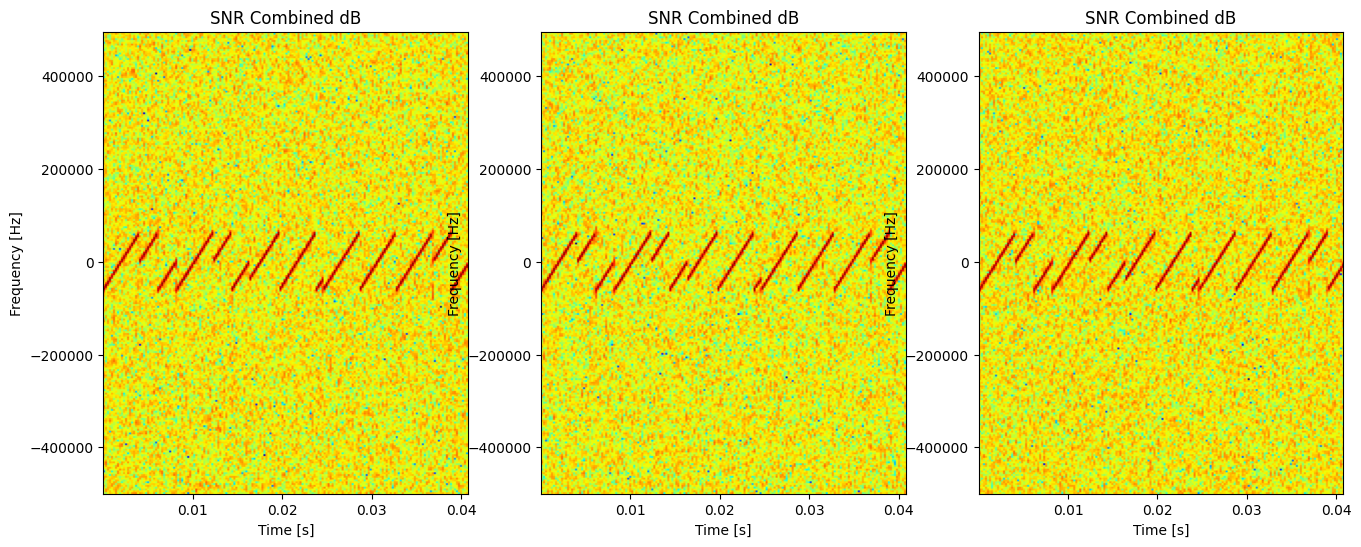

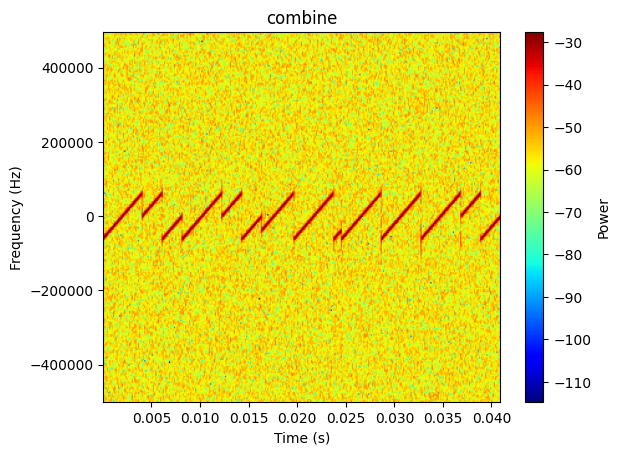

In [3]:
import numpy as np
from utils.LoRa import LoRa
import matplotlib.pyplot as plt
import importlib
import utils.my_lora_utils
importlib.reload(utils.my_lora_utils)
from utils.my_lora_utils import *
from pathlib import Path
print(utils.my_lora_utils.__file__)

folder_proc = Path("storage/result_proc")
folder_comb = Path("storage/result_combined")

signals = []
file_paths = []
combined = None

file_paths = sorted(folder_proc.glob("*.npy"))
for f in file_paths:
    with open(f, "rb") as fh:
        sig = np.load(fh)  # no mmap, file closes after with
        print(sig.shape)
        signals.append(sig)

file_paths2 = sorted(folder_comb.glob("*.npy"))
for f in file_paths2:
    with open(f, "rb") as fh:
        combined = np.load(fh)  # no mmap, file closes after with
    
len_a = len(signals)
print(len_a)
fig, axs = plt.subplots(nrows=1, ncols=len_a, figsize=(16, 6))  # 2 columns per row
k = 0
for sig in signals:
    print(sig.shape, sig.dtype)
    im2 = PLOT_SPECGRAM2(sig, 256, "SNR Combined dB", ax=axs[k])
    k = k + 1
plt.show()
PLOT_SPECGRAM(combined,256,"combine",128,1_000_000)

Upper freq max value : 4128.437611242523
Lower freq max value : 152.67537775307375
Combine freq max value : 4198.763873684318
Estimate symbol: 2
arg max : 2050


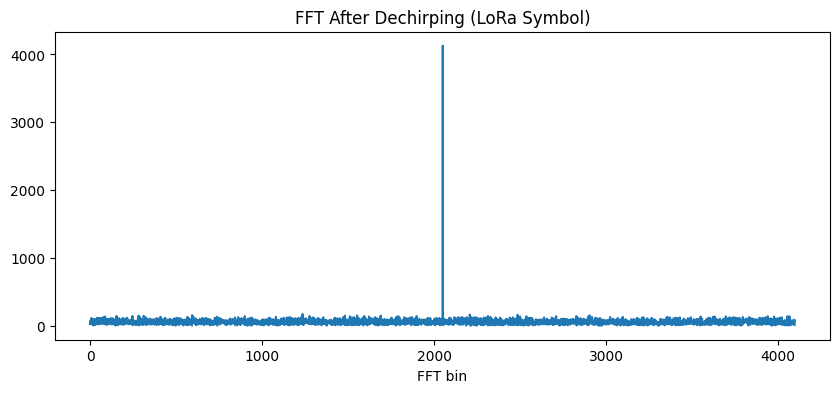

Upper freq max value : 4134.655655843374
Lower freq max value : 168.35970848181262
Combine freq max value : 4213.421939445149
Estimate symbol: 2
arg max : 2050


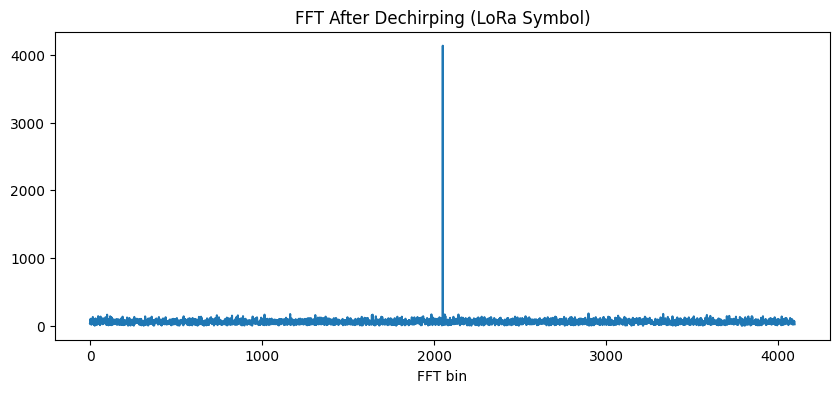

Upper freq max value : 4071.9222166926056
Lower freq max value : 153.99253851643275
Combine freq max value : 4142.393608235945
Estimate symbol: 2
arg max : 2050


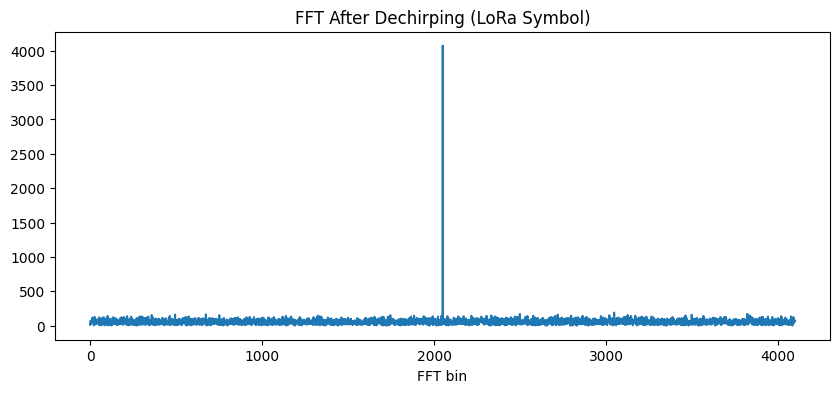

Upper freq max value : 12294.933202534576
Lower freq max value : 272.3617383299786
Combine freq max value : 12478.312544780374
Estimate symbol: 2
arg max : 2050


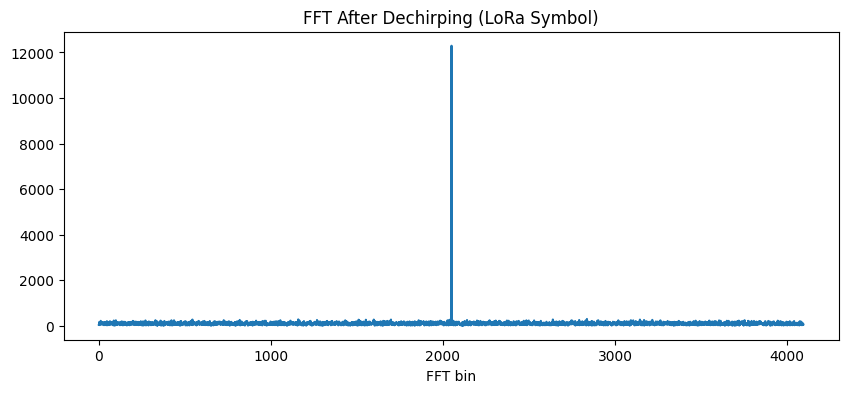

In [ ]:
sf = 9
bw = 125000
fs = 1000000
symbol_ = 0
lora_init = LoRa(sf, bw)
down_chirp = lora_init.gen_symbol_fs( 0, down=True, Fs=fs)
shift = 4096 * 5
for sig in signals:
    signal_a = sig[0+shift:4096+shift]
    dechirped_a = signal_a * down_chirp
    sym,max=estimate_symbol_custom(signal_a,"abc",sf,fs,bw)
    print("Estimate symbol:",sym)
    print("arg max :", max)
    fft_plot(dechirped_a)

# combined = signals[0] + signals[1] 

signal_com = combined[0+shift:4096+shift]
sym,max=estimate_symbol_custom(signal_com,"com",sf,fs,bw)
print("Estimate symbol:",sym)
print("arg max :", max)
signal_com = signal_com * down_chirp
fft_plot(signal_com)
## sequence = [0,256,0,256,100,100,1,2,3,256]
